In [1]:
from gensim.models import Word2Vec
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
data = pd.read_csv('../../cyberbullying/data/data.csv')

In [3]:
data.head()

,text,text.1,target
0,`- This is not ``creative``. Those are the di...,this is not creative those are the dictionar...,0.0
1,` :: the term ``standard model`` is itself le...,the term standard model is itself less npov...,0.0
2,"True or false, the situation as of March 200...",true or false the situation as of march was...,0.0
3,"Next, maybe you could work on being less cond...",next maybe you could work on being less conde...,0.0
4,This page will need disambiguation.,this page will need disambiguation,0.0


In [4]:
data['text']=data['text'].astype(str)

In [22]:
text = u'This is a smiley face \U0001f602'
text

'This is a smiley face 😂'

In [23]:
import re

text = u'This is a smiley face \U0001f602'
print(text) # with emoji

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

deEmojify(text)

This is a smiley face 😂


'This is a smiley face '

In [5]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.model_selection import train_test_split

def load_data(percentage_of_sentences=None):
    
    X_train, X_test, y_train, y_test = train_test_split(data['text'],data['target'],test_size=0.3,random_state=0)

    #train_sentences, y_train = tfds.as_numpy(train_data)
    #test_sentences, y_test = tfds.as_numpy(test_data)
    
    # Take only a given percentage of the entire data
    if percentage_of_sentences is not None:
        assert(percentage_of_sentences> 0 and percentage_of_sentences<=100)

        len_train = int(percentage_of_sentences/100*len(X_train))
        X_train, y_train = X_train[:len_train], y_train[:len_train]
  
        len_test = int(percentage_of_sentences/100*len(X_test))
        X_test, y_test = X_test[:len_test], y_test[:len_test]
    
    X_train = [text_to_word_sequence(_) for _ in X_train]
    X_test = [text_to_word_sequence(_) for _ in X_test]
    
    return X_train, y_train, X_test, y_test


2022-03-08 10:58:08.936491: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 10:58:08.936761: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
X_train, y_train, X_test, y_test = load_data(percentage_of_sentences=50)

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data.text)

y = data.target

nb_model = MultinomialNB()

nb_model.fit(X,y)

nb_model.score(X,y)

0.8959813638508934

In [8]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)
train_data, test_data = train_test_split(data,test_size=0.3,random_state=0)

In [9]:
len_1 = train_data[train_data['target']==1].shape[0]

In [10]:
train_data_0 = train_data[train_data['target']==0].sample(len_1)

In [11]:
train_data_1 = train_data[train_data['target']==1]

In [12]:
train_data_01 = pd.concat([train_data_0,train_data_1])

In [13]:
X_train_vec = vectorizer.fit_transform(train_data_01.text)
y_train = train_data_01.target
nb_model = MultinomialNB()

#nb_model.fit(X_train,y_train)

cv_results = cross_validate(nb_model,X_train_vec,train_data_01.target,cv=10,n_jobs=-1,scoring="recall")
cv_results['test_score'].mean()

0.8243670348343246

In [14]:
X_test_vec = vectorizer.transform(test_data.text)
y_test = test_data.target

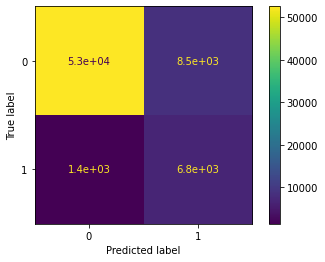

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train_vec,y_train)
y_pred = nb_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();


In [16]:
pd.DataFrame({'train': y_train.value_counts(),
              'test': y_test.value_counts()})

,train,test
0.0,19256,61047
1.0,19256,8238


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)

def balance_df(df=None, X=None, y=None):
    X = pd.DataFrame(X)
    if df is None:
        if X is not None or y is not None:
            df = X.join(y)
        else:
            print('se debe especificar df o X,y')
            return
    else:
        if X is not None and y is not None:
            df = df.copy().reset_index(drop=True)
        else:
            print('se debe especificar df o X,y')
            return
    
#     df_class_0 = df[y == 0]
#     df_class_1 = df[y == 1]
    
#     df_class_1_over = df_class_1.sample(y.value_counts()[0], replace=True)
    
#     df_new = pd.concat([df_class_0, df_class_1_over])
    df.reset_index(drop=True,inplace=True)
    return df


In [18]:
df_new = balance_df(X=X_train, y=y_train)
df_new.shape

(161664, 2)

In [19]:
X_train

32161       Note: This user is a suspected sockpuppet of...
94272       ::Yeah, don't call me a troll. It was a reas...
126924    Once again Kat and Andre make it through again...
133563    people tripping on acid or other hallucinogens...
124160    #MKR Stuff that - just buy the dam tortillas a...
                                ...                        
176963    `  ==Speedy deletion of I.D.milano Product Des...
117952    It is called CRACKLING! Stop being pretentious...
173685    ` :Well, it's not enough that it seem relevant...
43567     `  == Re: David Jordan ==  As I said, if you c...
199340    `  :::::::I haven't been around the page much ...
Name: text, Length: 161664, dtype: object

In [20]:
df_new[y==0]

/tmp/ipykernel_4375/3298942789.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new[y==0]


,text,target
0,Note: This user is a suspected sockpuppet of...,0.0
1,"::Yeah, don't call me a troll. It was a reas...",0.0
2,Once again Kat and Andre make it through again...,0.0
3,people tripping on acid or other hallucinogens...,0.0
4,#MKR Stuff that - just buy the dam tortillas a...,0.0
...,...,...
161659,` ==Speedy deletion of I.D.milano Product Des...,0.0
161660,It is called CRACKLING! Stop being pretentious...,0.0
161661,"` :Well, it's not enough that it seem relevant...",0.0
161662,"` == Re: David Jordan == As I said, if you c...",0.0


In [21]:
X_train = df_new.drop(columns='Class')
y_train = df_new['Class']

KeyError: "['Class'] not found in axis"

In [ ]:
pd.DataFrame({'train': y_train.value_counts(),
              'val': y_val.value_counts(),
              'test': y_test.value_counts()})

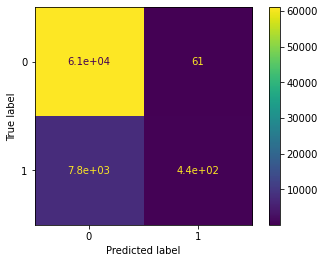

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()


In [22]:
y_train.value_counts()

0.0    142408
1.0     19256
Name: target, dtype: int64

In [7]:
#word2vec = Word2Vec(sentences=X_train, vector_size=10)

In [8]:
#comm_1 = word2vec.wv.most_similar('asshole')
#comm_1

[('nigger', 0.926256000995636),
 ('pollute', 0.9177514910697937),
 ('cunt', 0.916571319103241),
 ('childish', 0.9106816053390503),
 ('excuse', 0.9054148197174072),
 ('idiot', 0.8895363211631775),
 ('curious', 0.8892170190811157),
 ('insult', 0.8844789266586304),
 ('huh', 0.8802302479743958),
 ('terribly', 0.8771545886993408)]

In [9]:
#vocab_size = len(word2vec.wv.key_to_index)
#vocab_size

28817

In [10]:
model = MultinomialNB()
cv_results = cross_validate(model,X_train,y_train,cv=10)

/home/juanpedro/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[list(['please', 'do', 'not', 'remove', 'my', 'input', 'again', 'it', 'violates', 'wppreserve', 'wpvandalism', 'and', 'wpnotcensored', 'also', 'please', 'stop', 'being', 'idiot', 'americans', 'and', 'offending', 'the', 'rest', 'of', 'the', 'world', 'with', 'your', 'backward', 'biased', 'and', 'distorted', 'views', 'which', 'you', 'try', 'to', 'force', 'upon', 'is', 'like', 'this', 'articles', 'title'])
 list(['he', 'also', 'has', 'a', 'problem', 'with', 'his', 'left', 'eye', 'so', 'he', 'wears', 'an', 'eyepatch', 'or', 'sunglasses', 'but', 'its', 'okay', 'cause', 'he', 'is', 'samuel', 'motherfucking', 'jackson', 'semiprotected', 'edit', 'request', 'on', 'may', 'the', 'middle', '

/home/juanpedro/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[list(['note', 'this', 'user', 'is', 'a', 'suspected', 'sockpuppet', 'of', 'banned', 'who', 'is', 'engaged', 'in', 'the', 'typical', 'pattern', 'of', 'revert', 'warring', 'and', 'inciting', 'hatred', 'between', 'editors', 'of', 'different', 'nationalities'])
 list(['yeah', 'dont', 'call', 'me', 'a', 'troll', 'it', 'was', 'a', 'reasonable', 'request', 'with', 'perfectly', 'clear', 'logic'])
 list(['once', 'again', 'kat', 'and', 'andre', 'make', 'it', 'through', 'again', 'which', 'mkr', 'producers', 'dick', 'did', 'they', 'suck', 'to', 'get', 'through', 'im', 'fucking', 'hate', 'them'])
 ...
 list(['merger', 'proposal', 'hi', 'i', 'propose', 'a', 'merge', 'of', 'napa', 'citycounty

In [11]:
cv_results

{'fit_time': array([0.51289868, 0.25315309, 0.23274684, 0.25553799, 0.22250247,
        0.22286749, 0.23467255, 0.25012732, 0.2190578 , 0.25229836]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}